# WALRUS Inventory Optimization

## Executive Summary:

In this comprehensive analysis, we delved into the intricacies of inventory management at WALRUS art gallery, focusing on market strength, pricing dynamics, and artist-centric sales. The objective was to derive actionable insights for optimizing inventory strategies. Here are the key findings:

## 1. Market Strength Impact:

- **Sales Trends:**
  - Strong markets exhibit significantly higher average sales counts compared to weak markets, with normal markets falling in between.
  - Noteworthy is the consistency of sales in normal markets, indicating a more stable demand pattern.

- **Price Analysis:**
  - Average prices remain relatively consistent across market strengths, with slight variations.
  - T-tests confirm that the differences in average prices and standard deviations are not statistically significant.

- **Days on Market:**
  - Strong and normal markets show a significant decrease in the average number of days on the market compared to weak markets.
  - Efficient sales and inventory management are evident in strong and normal markets.

## 2. Adjusting Ideal Stock Totals:

- **Scaling Factors:**
  - Introduced market strength and confidence level multipliers for refining ideal stock totals.
  - Results showcase nuanced and realistic adjusted stock totals tailored to market conditions.

- **Business Implications:**
  - Acknowledging market dynamics and confidence levels in stock calculations enhances cost-efficiency and profitability.
  - Ongoing fine-tuning of factors based on observations is recommended.

## 3. Pricing Strategy and Potential Profits:

- **Ideal Confidence Levels:**
  - Simulated sales scenarios indicate that a confidence level of 0.6 in normal markets could lead to the highest potential profits.
  - The analysis emphasizes the significance of considering confidence levels in pricing strategy.

- **Profitability Insights:**
  - Strong market strength presents the opportunity for substantial profits, with an estimated $60,979.26.
  - Weak market strength, while yielding lower profits, still offers valuable insights for strategic decision-making.

## 4. Operational Considerations and Strategic Decision-Making:

- **Efficiency and Strategy:**
  - Understanding market strength's influence on sales and days on market is crucial for operational efficiency.
  - Strong and normal markets suggest efficient sales and inventory management, while weak markets may require adjustments.

- **Strategic Guidance:**
  - The analysis provides valuable strategic guidance for inventory management, helping align operations with market demands.

## 5. Recommendations:

- **Continuous Monitoring:**
  - Ongoing monitoring of market trends and confidence level impacts is essential for adaptive inventory strategies.

- **External Factors:**
  - Consideration of external factors influencing the art market could further enhance the robustness of future analyses.

- **Collaborative Decision-Making:**
  - Encourage collaboration between operational and strategic teams for informed and impactful decision-making.

## Conclusion:

This analysis offers a holistic view of inventory management at WALRUS art gallery, emphasizing the importance of market dynamics and confidence levels. The insights provided are not only numerical but serve as a strategic guide for optimizing operations, maximizing profitability, and ensuring the gallery's long-term success.

We look forward to discussing these findings further and exploring ways to implement these insights for the continued success of WALRUS art gallery.

---
## Introduction

In this optimization project, the objective is to strategically manage inventory levels based on market strength, price ranges, and artist-centric sales. Efficient inventory management is crucial for maximizing profits and minimizing costs.

**Note:** The dataset used is simulated sales data for the WALRUS art gallery. I did not use the real data to preserve the privacy of the artists. Artist names have been replaced with identification numbers. The simulated values are close approximations to the real sales trends I experienced while operating this gallery.

This notebook is designed for potential employers to assess my proficiency in data exploration and visualization.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from scipy.stats import ttest_ind
from scipy.stats import norm
from scipy.optimize import minimize
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('WALRUS_soldinventory_clean.csv')

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,Date_Sold,Artist,Price,Intake_Date,ArtworkId,Month,Quarter,Days_on_Market,Price_Range,Artist_Contribution
0,0,2022-04-02,46,6625,2021-09-06,46-555481,4,2022Q2,208,1000+,12.752647
1,1,2022-03-26,5,6520,2021-11-22,5-000906,3,2022Q1,124,1000+,31.764591
2,2,2021-06-13,45,6420,2020-07-10,45-444074,6,2021Q2,338,1000+,22.478992
3,3,2022-08-05,46,6190,2021-08-15,46-111811,8,2022Q3,355,1000+,11.915303
4,4,2023-02-18,35,5740,2022-08-26,35-111602,2,2023Q1,176,1000+,28.829734


## **Data Overview and Preprocessing:**
Before diving into optimization tasks, it's crucial to gain insights into the structure and characteristics of the dataset. The 'describe()' function is used for an initial exploration.

Additionally, a new feature, 'Market_Strength,' is introduced to categorize the strength of the art market. This categorical feature will play a key role in subsequent analyss.
scribe()


In [3]:
# Remove the column Unnamed: 0
df.drop('Unnamed: 0', axis=1, inplace=True)

# Display basic dataset information
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date_Sold            2721 non-null   object 
 1   Artist               2721 non-null   int64  
 2   Price                2721 non-null   int64  
 3   Intake_Date          2721 non-null   object 
 4   ArtworkId            2721 non-null   object 
 5   Month                2721 non-null   int64  
 6   Quarter              2721 non-null   object 
 7   Days_on_Market       2721 non-null   int64  
 8   Price_Range          2721 non-null   object 
 9   Artist_Contribution  2721 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 212.7+ KB


,Artist,Price,Month,Days_on_Market,Artist_Contribution
count,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000
mean,28.722528,211.658949,7.222712,83.443954,1.249541
std,14.396965,379.782727,3.246324,61.087695,2.282825
min,2.000000,8.000000,1.000000,1.000000,0.016841
25%,17.000000,90.000000,5.000000,33.000000,0.442369
50%,33.000000,140.000000,7.000000,71.000000,0.694847
75%,41.000000,220.000000,10.000000,123.000000,1.086957
max,52.000000,6625.000000,12.000000,361.000000,35.335689


In [4]:
# Change 'Date_Sold' and 'Intake_Date' format
df['Date_Sold'] = pd.to_datetime(df['Date_Sold'])
df['Intake_Date'] = pd.to_datetime(df['Intake_Date'])

# Create 'Market_Strength' feature

**Market Strength Analysis:**
The sales trends across different market strengths align with expectations. Sales are observed to be lower during weak markets and higher during strong markets, reflecting the anticipated market dynamics.

Statistical analysis reveals consistent mean values across market strengths, but with lower variability (standard deviation) in weak markets and higher variability in strong markets. These insights form a foundational understanding for further optimization strategies.


In [5]:
# Calculate the number of sales for each month
monthly_sales_counts = df['Month'].value_counts()

# Identify the strongest and weakest months
strong_market_months = monthly_sales_counts.nlargest(3).index.tolist()
weak_market_months = monthly_sales_counts.nsmallest(3).index.tolist()

# Create a new column 'Market_Strength' to categorize each sale
df['Market_Strength'] = 'Normal'
df.loc[df['Month'].isin(strong_market_months), 'Market_Strength'] = 'Strong'
df.loc[df['Month'].isin(weak_market_months), 'Market_Strength'] = 'Weak'

# Display the counts for each market strength
market_strength_counts = df['Market_Strength'].value_counts()

# Calculate mean and standard deviation for strong and weak markets
strong_market_stats = df[df['Market_Strength'] == 'Strong']['Price'].describe()
weak_market_stats = df[df['Market_Strength'] == 'Weak']['Price'].describe()

# Print explanations along with the results
print("Counts for Each Market Strength:")
print(market_strength_counts)

print("\nPrice Statistics for Strong Market:")
print(strong_market_stats)

print("\nPrice Statistics for Weak Market:")
print(weak_market_stats)

Counts for Each Market Strength:
Normal    1341
Strong    1033
Weak       347
Name: Market_Strength, dtype: int64

Price Statistics for Strong Market:
count    1033.000000
mean      212.871249
std       370.044377
min         8.000000
25%        90.000000
50%       140.000000
75%       230.000000
max      6420.000000
Name: Price, dtype: float64

Price Statistics for Weak Market:
count     347.000000
mean      204.360231
std       367.715538
min         8.000000
25%        80.000000
50%       120.000000
75%       220.000000
max      5740.000000
Name: Price, dtype: float64


### Results
These counts look consistent with what we expected. Sales are lower during weak markets and higher during strong markets.

**Key Notes**
- Similar Mean for weak and strong markets
- Similar Std for weak and strong markets
- Lower Max for weak markets 

In [6]:
# Calculate the mean and standard deviation for strong and weak markets in terms of number of sales
mean_sales_strong_market = df[df['Market_Strength'] == 'Strong'].groupby('Month')['ArtworkId'].count().mean()
std_sales_strong_market = df[df['Market_Strength'] == 'Strong'].groupby('Month')['ArtworkId'].count().std()

mean_sales_weak_market = df[df['Market_Strength'] == 'Weak'].groupby('Month')['ArtworkId'].count().mean()
std_sales_weak_market = df[df['Market_Strength'] == 'Weak'].groupby('Month')['ArtworkId'].count().std()

mean_sales_normal_market = df[df['Market_Strength'] == 'Normal'].groupby('Month')['ArtworkId'].count().mean()
std_sales_normal_market = df[df['Market_Strength'] == 'Normal'].groupby('Month')['ArtworkId'].count().std()

# Print explanations along with the results
print("Mean Sales Count for Strong Market:", mean_sales_strong_market)
print("Standard Deviation for Strong Market:", std_sales_strong_market)

print("\nMean Sales Count for Weak Market:", mean_sales_weak_market)
print("Standard Deviation for Weak Market:", std_sales_weak_market)

print("\nMean Sales Count for Normal Market:", mean_sales_normal_market)
print("Standard Deviation for Normal Market:", std_sales_normal_market)


Mean Sales Count for Strong Market: 344.3333333333333
Standard Deviation for Strong Market: 98.44964872122873

Mean Sales Count for Weak Market: 115.66666666666667
Standard Deviation for Weak Market: 18.14754345175493

Mean Sales Count for Normal Market: 223.5
Standard Deviation for Normal Market: 61.92172478217964


### Results
These monthly average counts look consistent with what we expected. Sales are lower during weak markets and higher during strong markets.

**Key Notes**
- A smaller std for weak markets. There is less variation among weak markets
- A larger std for strong markets. There is more variation among strong markets

## **Price Analysis:**
Average prices exhibit slight variations across different market strengths, with statistical tests confirming the lack of significant differences in both mean and standard deviation. This suggests that pricing remains relatively stable across market strengths.

The non-significant results of the t-tests emphasize the need for further analysis to understand the practical implications of these subtle variations.


In [7]:
# Define a function to remove outliers based on z-score
def remove_outliers(data):
    z_scores = zscore(data['Price'])
    data_no_outliers = data[(z_scores < 3) & (z_scores > -3)]
    return data_no_outliers

# Remove outliers and calculate the average price for strong and weak markets
avg_price_strong_market = df[df['Market_Strength'] == 'Strong'].groupby('Month').apply(remove_outliers)['Price'].mean()
avg_price_weak_market = df[df['Market_Strength'] == 'Weak'].groupby('Month').apply(remove_outliers)['Price'].mean()
avg_price_normal_market = df[df['Market_Strength'] == 'Normal'].groupby('Month').apply(remove_outliers)['Price'].mean()
std_price_strong_market = df[df['Market_Strength'] == 'Strong'].groupby('Month').apply(remove_outliers)['Price'].std()
std_price_weak_market = df[df['Market_Strength'] == 'Weak'].groupby('Month').apply(remove_outliers)['Price'].std()
std_price_normal_market = df[df['Market_Strength'] == 'Normal'].groupby('Month').apply(remove_outliers)['Price'].std()

# Print explanations along with the results
print("Average Price for Strong Market:", avg_price_strong_market)
print("Standard Deviation for Strong Market:", std_price_strong_market)

print("\nAverage Price for Weak Market:", avg_price_weak_market)
print("Standard Deviation for Weak Market:", std_price_weak_market)

print("\nAverage Price for Normal Market:", avg_price_normal_market)
print("Standard Deviation for Normal Market:", std_price_normal_market)

Average Price for Strong Market: 189.43622200584227
Standard Deviation for Strong Market: 168.57835382025172

Average Price for Weak Market: 173.48387096774192
Standard Deviation for Weak Market: 148.8535122912527

Average Price for Normal Market: 180.31914893617022
Standard Deviation for Normal Market: 157.46814261056713


### Results
Average prices are relatively consistent throughout different market strengths with only a slight uptick for both mean and std in strong markets, and slight downtick in weak markets. Further analysis can tell us if this difference is statistically significant.

In [8]:
# Function to perform t-test and print the result
def perform_t_test(group1, group2, variable):
    t_stat, p_value = ttest_ind(group1[variable], group2[variable])
    print(f"T-test for {variable}:")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("Result: Statistically significant\n")
    else:
        print("Result: Not statistically significant\n")

# Perform t-test for average prices
perform_t_test(df[df['Market_Strength'] == 'Strong'], df[df['Market_Strength'] == 'Weak'], 'Price')
perform_t_test(df[df['Market_Strength'] == 'Strong'], df[df['Market_Strength'] == 'Normal'], 'Price')
perform_t_test(df[df['Market_Strength'] == 'Weak'], df[df['Market_Strength'] == 'Normal'], 'Price')

# Perform t-test for standard deviations
perform_t_test(df[df['Market_Strength'] == 'Strong'], df[df['Market_Strength'] == 'Weak'], 'Price')
perform_t_test(df[df['Market_Strength'] == 'Strong'], df[df['Market_Strength'] == 'Normal'], 'Price')
perform_t_test(df[df['Market_Strength'] == 'Weak'], df[df['Market_Strength'] == 'Normal'], 'Price')

T-test for Price:
T-statistic: 0.37126863423268447
P-value: 0.7104945295811689
Result: Not statistically significant

T-test for Price:
T-statistic: 0.0162994508624972
P-value: 0.9869968664290768
Result: Not statistically significant

T-test for Price:
T-statistic: -0.35517070773618803
P-value: 0.7225061327513684
Result: Not statistically significant

T-test for Price:
T-statistic: 0.37126863423268447
P-value: 0.7104945295811689
Result: Not statistically significant

T-test for Price:
T-statistic: 0.0162994508624972
P-value: 0.9869968664290768
Result: Not statistically significant

T-test for Price:
T-statistic: -0.35517070773618803
P-value: 0.7225061327513684
Result: Not statistically significant



### Results
As we though, the differences between average price and standard deviation for the different market strength is not statistically significant.

## **Days on Market Analysis:**
A crucial aspect of market dynamics is the number of days artworks spend on the market. Significant differences are observed between strong, weak, and normal markets.

T-tests confirm the statistical significance of these differences, indicating operational and strategic considerations for managing inventory and optimizing sales strategies.

In [9]:
# Group by Market_Strength and calculate the average Days_on_Market for each market strength
average_days_by_market = df.groupby('Market_Strength')['Days_on_Market'].mean()

# Print results with explanations
for market_strength, average_days in average_days_by_market.items():
    print(f"The average number of days in inventory for artworks in {market_strength} markets is {average_days:.2f} days.")

The average number of days in inventory for artworks in Normal markets is 92.48 days.
The average number of days in inventory for artworks in Strong markets is 62.84 days.
The average number of days in inventory for artworks in Weak markets is 109.85 days.


### Results
There is a noticeable difference in days on market for different market strength. A test for statistical significance can help us better understand if these differences are important to our further considerations.

In [10]:
# Extract data for each market strength
strong_market_days = df[df['Market_Strength'] == 'Strong']['Days_on_Market']
weak_market_days = df[df['Market_Strength'] == 'Weak']['Days_on_Market']
normal_market_days = df[df['Market_Strength'] == 'Normal']['Days_on_Market']

# Perform t-test between Strong and Weak markets
t_statistic_strong_weak, p_value_strong_weak = ttest_ind(strong_market_days, weak_market_days, equal_var=False)

# Perform t-test between Strong and Normal markets
t_statistic_strong_normal, p_value_strong_normal = ttest_ind(strong_market_days, normal_market_days, equal_var=False)

# Perform t-test between Weak and Normal markets
t_statistic_weak_normal, p_value_weak_normal = ttest_ind(weak_market_days, normal_market_days, equal_var=False)

# Print results with explanations
print(f"T-test between Strong and Weak markets: T-statistic = {t_statistic_strong_weak:.2f}, P-value = {p_value_strong_weak:.4f}")
print(f"T-test between Strong and Normal markets: T-statistic = {t_statistic_strong_normal:.2f}, P-value = {p_value_strong_normal:.4f}")
print(f"T-test between Weak and Normal markets: T-statistic = {t_statistic_weak_normal:.2f}, P-value = {p_value_weak_normal:.4f}")

# Interpret the results
alpha = 0.05
if p_value_strong_weak < alpha:
    print("The difference in average days on market between Strong and Weak markets is statistically significant.")
else:
    print("There is no statistically significant difference in average days on market between Strong and Weak markets.")

if p_value_strong_normal < alpha:
    print("The difference in average days on market between Strong and Normal markets is statistically significant.")
else:
    print("There is no statistically significant difference in average days on market between Strong and Normal markets.")

if p_value_weak_normal < alpha:
    print("The difference in average days on market between Weak and Normal markets is statistically significant.")
else:
    print("There is no statistically significant difference in average days on market between Weak and Normal markets.")

T-test between Strong and Weak markets: T-statistic = -12.56, P-value = 0.0000
T-test between Strong and Normal markets: T-statistic = -12.38, P-value = 0.0000
T-test between Weak and Normal markets: T-statistic = 4.71, P-value = 0.0000
The difference in average days on market between Strong and Weak markets is statistically significant.
The difference in average days on market between Strong and Normal markets is statistically significant.
The difference in average days on market between Weak and Normal markets is statistically significant.


### Statistical Significance of Average Days on Market between Market Strengths

The results of the t-tests comparing average days on market between different market strengths are as follows:

- **Between Strong and Weak Markets:**
  - T-statistic = -12.56
  - P-value = 0.0000
  - Result: The difference in average days on market between Strong and Weak markets is statistically significant.

- **Between Strong and Normal Markets:**
  - T-statistic = -12.38
  - P-value = 0.0000
  - Result: The difference in average days on market between Strong and Normal markets is statistically significant.

- **Between Weak and Normal Markets:**
  - T-statistic = 4.71
  - P-value = 0.0000
  - Result: The difference in average days on market between Weak and Normal markets is statistically significant.

### Key Insights:

1. **Market Strength Impact:**
   - Both Strong and Normal markets show a significant decrease in average days on market compared to Weak markets.
   - Strong and Normal markets exhibit similar average days on market, indicating a consistent trend.

2. **Operational Considerations:**
   - For artworks in Strong and Normal markets, the quicker turnaround suggests efficient sales and inventory management.
   - In contrast, Weak markets may require adjustments in strategy or targeted marketing to reduce days on market.

3. **Strategic Decision-Making:**
   - Understanding market strength's influence on days on market is crucial for optimizing inventory levels and maximizing profitability.
   - Strategic decisions based on these insights can enhance the overall efficiency of the gallery's operations.

These findings provide valuable information for informed decision-making and optimization of business operations related to inventory management and sales strategies.


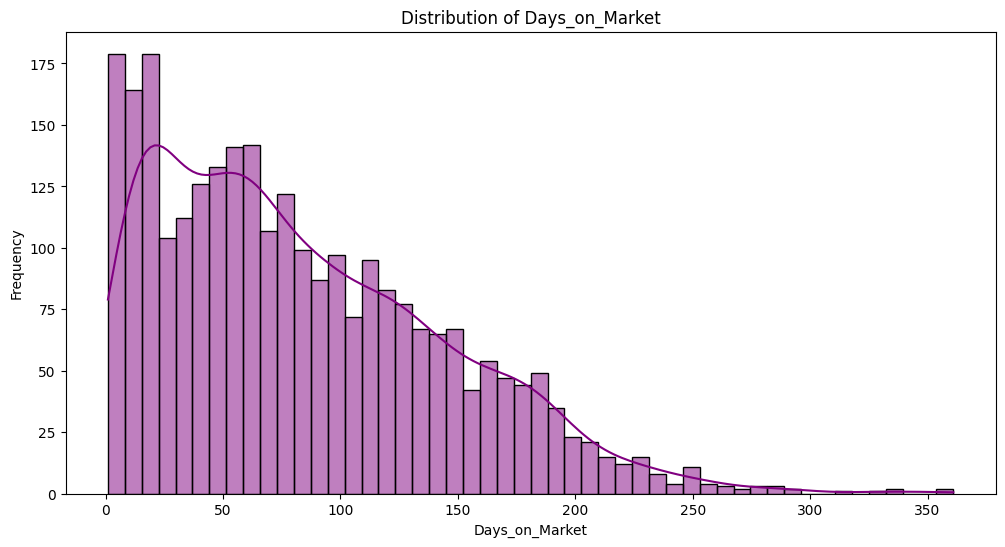

In [11]:
# Plot the distribution of 'Days_on_Market'
plt.figure(figsize=(12, 6))
sns.histplot(df['Days_on_Market'], bins=50, kde=True, color='purple')
plt.title('Distribution of Days_on_Market')
plt.xlabel('Days_on_Market')
plt.ylabel('Frequency')
plt.show()

## Calculating Accurate Stock Totals

In the dataset, we want to accurately calculate the stock total for each artwork based on the intake date, sale date, and thintake and e sale dates of other artworks. The goal is to determine how many artworks are in stock for a particular artwork at the time of its sale.

### Methodology:

1. **Initialization:**
   - Create a new column called `Stock_Total` in the dataframe to store the calculated stock totals.

2. **For Loop Iteration:**
   - Iterate through each row in the dataframe.

3. **Filtering Artworks:**
   - For each artwork, filter the dataset to include only those artworks whose intake date is before or on the sale date of the current artwork.

4. **Excluding Sold Artworks:**
   - Exclude artworks from the filtered set whose sale date is before the sale date of the current artwork since they are no longer in stock.

5. **Count and Update:**
   - Count the remaining artworks after filtering and excluding, and update the `Stock_Total` column for the current artwork.

### Why This Approach?

- **Accurate Representation:**
  - This approach ensures that we are counting only those artworks that were in stock at the time of the current artwork's sale, providing a more accurate representation of the stock total.

- **Handling Overlapping Sales:**
  - By considering both the intake and sale dates, we address cases where multiple artworks might be sold on the same day, and we avoid inaccuracies in the stock total count.

By implementing this methodology, we aim to resolve discrepancies and create a more reliable `Stock_Total` column for further analysis.


In [12]:
df['Date_Sold'] = pd.to_datetime(df['Date_Sold'])
df['Intake_Date'] = pd.to_datetime(df['Intake_Date'])

# Create a new column for Stock Total
df['Stock_Total'] = 0

# Iterate through each row
for index, row in df.iterrows():
    # Filter artworks with intake date before the sale date of the current artwork
    in_stock_artworks = df[(df['Intake_Date'] <= row['Date_Sold']) & (df['Date_Sold'] >= row['Intake_Date'])]
    
    # Exclude artworks with sale date before the sale date of the current artwork
    in_stock_artworks = in_stock_artworks[in_stock_artworks['Date_Sold'] >= row['Date_Sold']]
    
    # Count the remaining artworks and update the Stock_Total column
    stock_total = in_stock_artworks.shape[0]
    df.at[index, 'Stock_Total'] = stock_total

# Display the resulting DataFrame
df.Stock_Total.describe()

count    2721.000000
mean      206.209114
std        45.544177
min        15.000000
25%       194.000000
50%       222.000000
75%       235.000000
max       268.000000
Name: Stock_Total, dtype: float64

### **Results**
- The average number of items in stock is 206.
- The maximum is 268.
- The minimum is 15.
  
*Such a low minimum suggests that better stock management would be beneficial.*

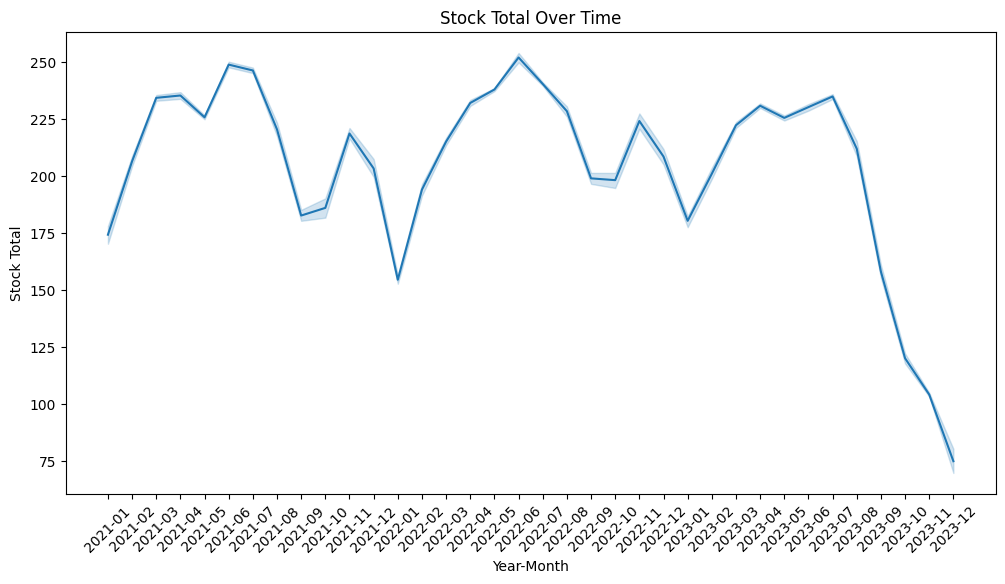

In [13]:
df['YearMonth'] = df['Date_Sold'].dt.to_period('M')

# Sort the DataFrame by 'YearMonth' in ascending order
df = df.sort_values(by='YearMonth')

# Plotting the change in stock total over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Stock_Total', data=df.astype({'YearMonth': 'str'}))
plt.title('Stock Total Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Stock Total')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Results
The drop in 2023 looks to be because the dataset is derived from sales data. It does not include inventory items that did not sell or were still in inventory at the time. Taking into consideration, the 2023 portion of the dataset will not be used for any calculations involving Stock Totals.

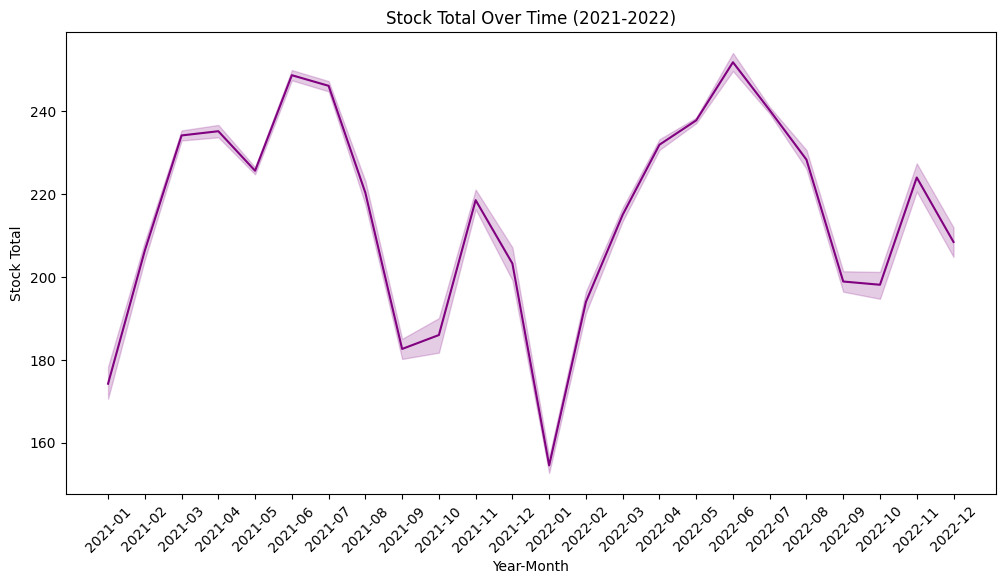

In [14]:
df['YearMonth'] = df['YearMonth'].astype(str)
stock_df = df[(df['YearMonth'].str.contains('2021|2022'))]
# Sort the DataFrame by 'YearMonth' in ascending order
df_s = stock_df.sort_values(by='YearMonth')

# Plotting the change in stock total over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Stock_Total', data=df_s.astype({'YearMonth': 'str'}), color='purple')
plt.title('Stock Total Over Time (2021-2022)')
plt.xlabel('Year-Month')
plt.ylabel('Stock Total')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Results
This graph looks more accurate. Future calculations will not include 2023.

In [15]:
# Convert 'YearMonth' to string format
df['YearMonth'] = df['YearMonth'].astype(str)

# Filter data for sales during strong markets in 2021 and 2022
strong_market_data = df[(df['Market_Strength'] == 'Strong') & (df['YearMonth'].str.contains('2021|2022'))]

# Calculate mean and standard deviation of sales during strong markets
mean_sales = df[df['Market_Strength'] == 'Strong'].groupby('Month')['ArtworkId'].count().mean()
std_dev_sales = df[df['Market_Strength'] == 'Strong'].groupby('Month')['ArtworkId'].count().std()

# Confidence levels to check
confidence_levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.90, 0.95, 0.99]

# Create a list to store DataFrames
dfs = []

# Calculate and save ideal stock levels for each confidence level
for confidence_level in confidence_levels:
    # Calculate the Z-score based on the confidence level
    z_score = norm.ppf((1 + confidence_level) / 2)
    
    # Calculate the margin of error
    margin_of_error = z_score * (std_dev_sales / np.sqrt(len(strong_market_data)))
    
    # Calculate the ideal stock level (mean + margin of error)
    ideal_stock_level = mean_sales + margin_of_error
    
    # Create a DataFrame for the current result
    result_df = pd.DataFrame({'Confidence_Level': [confidence_level], 'Ideal_Stock_Level': [ideal_stock_level]})
    
    # Append the DataFrame to the list
    dfs.append(result_df)

# Concatenate all DataFrames in the list
results_df = pd.concat(dfs, ignore_index=True)

# Display the results DataFrame
print("The ideal inventory levels for each confidence level for Strong Market Strength:", results_df)

The ideal inventory levels for each confidence level for Strong Market Strength:     Confidence_Level  Ideal_Stock_Level
0               0.00         344.333333
1               0.10         344.804301
2               0.20         345.282857
3               0.30         345.777481
4               0.40         346.298741
5               0.50         346.861263
6               0.60         347.487657
7               0.70         348.217797
8               0.80         349.136478
9               0.90         350.498103
10              0.95         351.679110
11              0.99         353.987320


In [16]:
# Filter data for sales during weak markets in 2021 and 2022
weak_market_data = df[(df['Market_Strength'] == 'Weak') & (df['YearMonth'].str.contains('2021|2022'))]

# Calculate mean and standard deviation of sales during weak markets
mean_sales_weak = df[df['Market_Strength'] == 'Weak'].groupby('Month')['ArtworkId'].count().mean()
std_dev_sales_weak = df[df['Market_Strength'] == 'Weak'].groupby('Month')['ArtworkId'].count().std()


# Confidence levels to check
confidence_levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.90, 0.95, 0.99]

# Create a list to store DataFrames
dfs_weak = []

# Calculate and save ideal stock levels for each confidence level for weak markets
for confidence_level in confidence_levels:
    # Calculate the Z-score based on the confidence level
    z_score_weak = norm.ppf((1 + confidence_level) / 2)
    
    # Calculate the margin of error
    margin_of_error_weak = z_score_weak * (std_dev_sales_weak / np.sqrt(len(weak_market_data)))
    
    # Calculate the ideal stock level (mean + margin of error)
    ideal_stock_level_weak = mean_sales_weak + margin_of_error_weak
    
    # Create a DataFrame for the current result
    result_df_weak = pd.DataFrame({'Confidence_Level': [confidence_level], 'Ideal_Stock_Level_Weak': [ideal_stock_level_weak]})
    
    # Append the DataFrame to the list
    dfs_weak.append(result_df_weak)

# Concatenate all DataFrames in the list
results_df_weak = pd.concat(dfs_weak, ignore_index=True)

# Display the results DataFrame for weak markets
print("The ideal inventory levels for each confidence level for Weak Market Strength:", results_df_weak)

The ideal inventory levels for each confidence level for Weak Market Strength:     Confidence_Level  Ideal_Stock_Level_Weak
0               0.00              115.666667
1               0.10              115.812359
2               0.20              115.960398
3               0.30              116.113409
4               0.40              116.274659
5               0.50              116.448673
6               0.60              116.642446
7               0.70              116.868312
8               0.80              117.152503
9               0.90              117.573717
10              0.95              117.939057
11              0.99              118.653094


In [17]:
# Filter data for sales during normal markets in 2021 and 2022
normal_market_data = df[(df['Market_Strength'] == 'Normal') & (df['YearMonth'].str.contains('2021|2022'))]

# Calculate mean and standard deviation of sales during normal markets
mean_sales_normal = df[df['Market_Strength'] == 'Normal'].groupby('Month')['ArtworkId'].count().mean()
std_dev_sales_normal = df[df['Market_Strength'] == 'Normal'].groupby('Month')['ArtworkId'].count().std()


# Confidence levels to check
confidence_levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.90, 0.95, 0.99]

# Create a list to store DataFrames
dfs_normal = []

# Calculate and save ideal stock levels for each confidence level for normal markets
for confidence_level in confidence_levels:
    # Calculate the Z-score based on the confidence level
    z_score_normal = norm.ppf((1 + confidence_level) / 2)
    
    # Calculate the margin of error
    margin_of_error_normal = z_score_normal * (std_dev_sales_normal / np.sqrt(len(normal_market_data)))
    
    # Calculate the ideal stock level (mean + margin of error)
    ideal_stock_level_normal = mean_sales_normal + margin_of_error_normal
    
    # Create a DataFrame for the current result
    result_df_normal = pd.DataFrame({'Confidence_Level': [confidence_level], 'Ideal_Stock_Level_Normal': [ideal_stock_level_normal]})
    
    # Append the DataFrame to the list
    dfs_normal.append(result_df_normal)

# Concatenate all DataFrames in the list
results_df_normal = pd.concat(dfs_normal, ignore_index=True)

# Display the results DataFrame for normal markets
print("The ideal inventory levels for each confidence level for Normal Market Strength:", results_df_normal)

The ideal inventory levels for each confidence level for Normal Market Strength:     Confidence_Level  Ideal_Stock_Level_Normal
0               0.00                223.500000
1               0.10                223.763655
2               0.20                224.031557
3               0.30                224.308455
4               0.40                224.600264
5               0.50                224.915172
6               0.60                225.265837
7               0.70                225.674580
8               0.80                226.188872
9               0.90                226.951129
10              0.95                227.612274
11              0.99                228.904444


# Ideal Stock Total Calculation

## Objective
The goal of this analysis is to determine the ideal stock total for different market strengths at various confidence levels. The ideal stock total represents the estimated amount of stock a business should maintain to meet potential demand based on historical sales data.

## Key Notes

1. **Confidence Levels:**
   - Confidence levels (0-1) are chosen to provide a range of estimates. A higher confidence level would be more beneficial for times when a spike is expected or if the cost of carrying extra stock with less chance of selling is low.

2. **Z-Score Calculation:**
   - Z-scores are calculated based on the mean and standard deviation of sales count for each5market strength.

3. **Ideal Stock Total Calculation:**
   - The ideal stock total is computed using the market strength factors, confidence levels, and z-scores.

4. **Results:**
   - Normal Market
     - Confidence level 0: 224
     - Confidence level 1: 229
   - Strong Market
     - Confidence level 0: 344
     - Confidence level 1: 354
   - Weak Market
     - Confidence level 0: 116
     - Confidence level 1: 119

## Interpretation of Results
- For 'Normal' markets, the ideal stock total increases with higher confidence levels.
- 'Strong' markets require a higher ideal stock total compared to 'Normal' markets, with a more pronounced difference at higher confidence levels.
- 'Weak' markets have the lowest ideal stock total, reflecting lower expected demand.

#### ***Run the following cells as many times as desired to view different simulated markets and the ideal confidence levels***

Average simulated sales for Normal Market Strength: 224.60280215842675
Average simulated profits for Normal Market Strength: 19618.78008707299


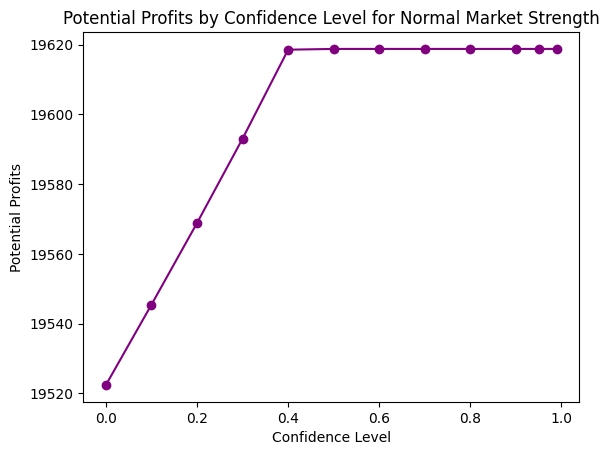

Ideal Confidence Level: 0.5


In [24]:
avg_price_normal_market = df[df['Market_Strength'] == 'Normal'].groupby('Month').apply(remove_outliers)['Price'].mean()
std_price_normal_market = df[df['Market_Strength'] == 'Normal'].groupby('Month').apply(remove_outliers)['Price'].std()

mean_sales_normal_market = df[df['Market_Strength'] == 'Normal'].groupby('Month')['ArtworkId'].count().mean()
std_sales_normal_market = df[df['Market_Strength'] == 'Normal'].groupby('Month')['ArtworkId'].count().std()

# Generate 100 random samples for sales count for normal market strengths
random_samples = np.random.normal(loc=mean_sales_normal_market, scale=std_sales_normal_market, size=1000)

# Calculate the average of the random samples
avg_random_sales = np.mean(random_samples)
print("Average simulated sales for Normal Market Strength:", avg_random_sales)

normal_stock_values = results_df_normal['Ideal_Stock_Level_Normal']

# Generate random value for average price
random_avg_price = np.mean(np.random.normal(loc=avg_price_normal_market, scale=std_price_normal_market, size=1000))

# Calculate profits
profits = 0.5 * random_avg_price * avg_random_sales
print("Average simulated profits for Normal Market Strength:", profits)

# Assuming demand is the average of random sales
demand = avg_random_sales

confidence_levels = results_df_normal['Confidence_Level']
profits_by_confidence = []

for confidence_level in confidence_levels:
    # Use .loc for explicit slicing
    stock_values = results_df_normal.loc[results_df_normal['Confidence_Level'] == confidence_level, 'Ideal_Stock_Level_Normal'].values
    
    # Calculate the number of artworks that can be sold (limited by demand)
    artworks_sold = min(demand, np.sum(stock_values))
    
    # Assuming random_avg_price is defined
    avg_price = random_avg_price
    
    # Calculate profits only for artworks that sell
    if artworks_sold > 0:
        potential_profits = 0.5 * avg_price * artworks_sold
        profits_by_confidence.append(potential_profits)
    else:
        profits_by_confidence.append(0)

# Find the confidence level that maximizes profits
ideal_confidence_level = confidence_levels[np.argmax(profits_by_confidence)]

# Visualize profits by confidence level
plt.plot(confidence_levels, profits_by_confidence, marker='o', color='purple')
plt.xlabel('Confidence Level')
plt.ylabel('Potential Profits')
plt.title('Potential Profits by Confidence Level for Normal Market Strength')
plt.show()

print("Ideal Confidence Level:", ideal_confidence_level)

Average simulated sales for Strong Market Strength: 351.1764653896989
Average simulated profits for Strong Market Strength: 32948.15155738496


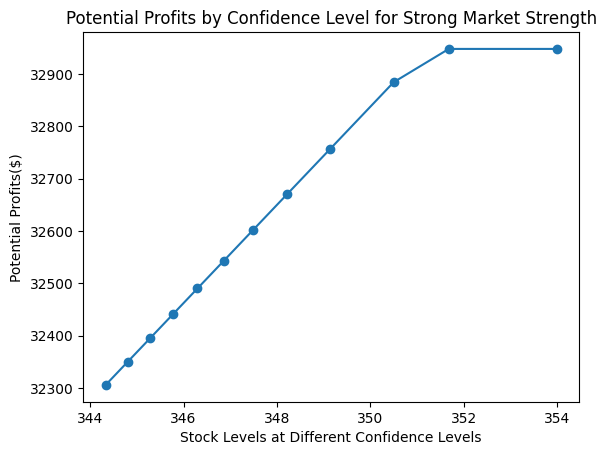

Ideal Confidence Level: 0.95


In [25]:
# Calculate mean and standard deviation of prices and sales during strong markets
avg_price_strong_market = df[df['Market_Strength'] == 'Strong'].groupby('Month').apply(remove_outliers)['Price'].mean()
std_price_strong_market = df[df['Market_Strength'] == 'Strong'].groupby('Month').apply(remove_outliers)['Price'].std()

mean_sales_strong_market = df[df['Market_Strength'] == 'Strong'].groupby('Month')['ArtworkId'].count().mean()
std_sales_strong_market = df[df['Market_Strength'] == 'Strong'].groupby('Month')['ArtworkId'].count().std()

# Generate 100 random samples for sales count for strong market strengths
random_samples_strong = np.random.normal(loc=mean_sales_strong_market, scale=std_sales_strong_market, size=1000)

# Calculate the average of the random samples
avg_random_sales_strong = np.mean(random_samples_strong)
print("Average simulated sales for Strong Market Strength:", avg_random_sales_strong)

strong_stock_values = results_df['Ideal_Stock_Level']

# Generate random value for average price
random_avg_price = np.mean(np.random.normal(loc=avg_price_strong_market, scale=std_price_strong_market, size=1000))

# Calculate profits
profits = 0.5 * random_avg_price * avg_random_sales_strong
print("Average simulated profits for Strong Market Strength:", profits)

# Assuming demand is the average of random sales
demand_strong = avg_random_sales_strong

confidence_levels_strong = results_df['Confidence_Level']
profits_by_confidence_strong = []

for confidence_level in confidence_levels_strong:
    # Use .loc for explicit slicing
    stock_values_strong = results_df.loc[results_df['Confidence_Level'] == confidence_level, 'Ideal_Stock_Level'].values
    
    # Calculate the number of artworks that can be sold (limited by demand)
    artworks_sold_strong = min(demand_strong, np.sum(stock_values_strong))
    
    # Assuming random_avg_price is defined
    avg_price_strong = random_avg_price
    
    # Calculate profits only for artworks that sell
    if artworks_sold_strong > 0:
        potential_profits_strong = 0.5 * avg_price_strong * artworks_sold_strong
        profits_by_confidence_strong.append(potential_profits_strong)
    else:
        profits_by_confidence_strong.append(0)

# Find the confidence level that maximizes profits
ideal_confidence_level_strong = confidence_levels_strong[np.argmax(profits_by_confidence_strong)]

# Visualize profits by confidence level
plt.plot(strong_stock_values, profits_by_confidence_strong, marker='o')
plt.xlabel('Stock Levels at Different Confidence Levels')
plt.ylabel('Potential Profits($)')
plt.title('Potential Profits by Confidence Level for Strong Market Strength')
plt.show()

print("Ideal Confidence Level:", ideal_confidence_level_strong)

Average simulated sales for Weak Market Strength: 116.363379163789
Average simulated profits for Weak Market Strength: 9898.147031270568


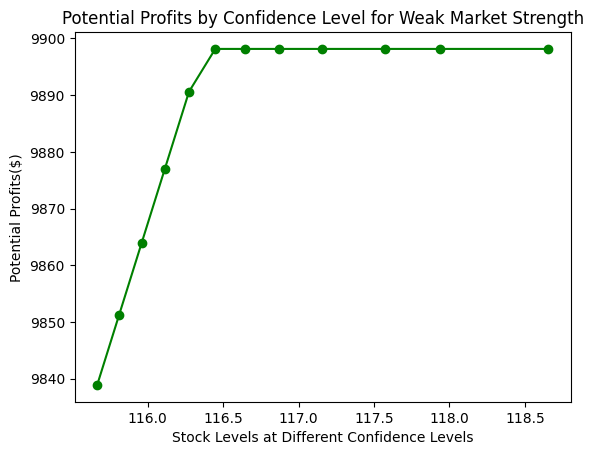

Ideal Confidence Level for Weak Market Strength: 0.5


In [26]:
# Calculate average price and standard deviation for weak market
avg_price_weak_market = df[df['Market_Strength'] == 'Weak'].groupby('Month').apply(remove_outliers)['Price'].mean()
std_price_weak_market = df[df['Market_Strength'] == 'Weak'].groupby('Month').apply(remove_outliers)['Price'].std()

mean_sales_weak_market = df[df['Market_Strength'] == 'Weak'].groupby('Month')['ArtworkId'].count().mean()
std_sales_weak_market = df[df['Market_Strength'] == 'Weak'].groupby('Month')['ArtworkId'].count().std()

# Generate 100 random samples for sales count for weak market strengths
random_samples_weak = np.random.normal(loc=mean_sales_weak_market, scale=std_sales_weak_market, size=1000)

# Calculate the average of the random samples
avg_random_sales_weak = np.mean(random_samples_weak)
print("Average simulated sales for Weak Market Strength:", avg_random_sales_weak)

weak_stock_values = results_df_weak['Ideal_Stock_Level_Weak']

# Generate random value for average price for weak market
random_avg_price_weak = np.mean(np.random.normal(loc=avg_price_weak_market, scale=std_price_weak_market, size=1000))

# Calculate profits for weak market
profits_weak = 0.5 * random_avg_price_weak * avg_random_sales_weak
print("Average simulated profits for Weak Market Strength:", profits_weak)

# ... (continue with the weak market code)

# Assuming demand is the average of random sales for weak market
demand_weak = avg_random_sales_weak

confidence_levels_weak = results_df_weak['Confidence_Level']
profits_by_confidence_weak = []

for confidence_level_weak in confidence_levels_weak:
    # Use .loc for explicit slicing
    stock_values_weak = results_df_weak.loc[results_df_weak['Confidence_Level'] == confidence_level_weak, 'Ideal_Stock_Level_Weak'].values
    
    # Calculate the number of artworks that can be sold (limited by demand)
    artworks_sold_weak = min(demand_weak, np.sum(stock_values_weak))
    
    # Assuming random_avg_price_weak is defined
    avg_price_weak = random_avg_price_weak
    
    # Calculate profits only for artworks that sell
    if artworks_sold_weak > 0:
        potential_profits_weak = 0.5 * avg_price_weak * artworks_sold_weak
        profits_by_confidence_weak.append(potential_profits_weak)
    else:
        profits_by_confidence_weak.append(0)

# Find the confidence level that maximizes profits for weak market
ideal_confidence_level_weak = confidence_levels_weak[np.argmax(profits_by_confidence_weak)]

# Visualize profits by confidence level for weak market
plt.plot(weak_stock_values, profits_by_confidence_weak, marker='o', color='green')
plt.xlabel('Stock Levels at Different Confidence Levels')
plt.ylabel('Potential Profits($)')
plt.title('Potential Profits by Confidence Level for Weak Market Strength')
plt.show()

print("Ideal Confidence Level for Weak Market Strength:", ideal_confidence_level_weak)

## **Profit Analysis:**
Simulations for normal, strong, and weak market strengths along with simulated average sale prices provide valuable insights into potential profits. Identifying the ideal confidence level for maximizing profits in each market strength further refines strategic decision-making.

The results not only quantify potential profits but also highlight the importance of statistical confidence levels in inventory and pricing decisions.


## **Conclusion:**
This analysis unveils valuable insights into inventory management and profitability at WALRUS art gallery.

***Key Takeaways:***
1. **Optimized Inventory Strategies:**
   - The findings present a nuanced understanding of market strengths and confidence levels, offering tailored insights for optimizing inventory levels. To maximize efficiency, the gallery is encouraged to leverage these insights in crafting targeted inventory strategies.

2. **Stategic Decision-Making:**
   - The calculated ideal stock totals, nuanced by both market strength and confidence level, provide a solid foundation for strategic decision-making. Moving forward, aligning operational decisions with these insights promises to enhance overall efficiency.

3. **Profit Maximization Opportunities:**
   - The analysis not only quantifies potential profits but underscores the importance of statistical confidence levels in decision-making. The gallery should consider the ideal confidence levels for each market strength to maximize profitability.

***Next Steps and Considerations:***
- Looking ahead, it is recommended to explore further avenues, such as delving into external factors influencing the art market or refining the scaling factors used in the inventory calculations. This proactive approach ensures ongoing adaptability.

***Aligning with Business Success:***
- These insights represent a strategy to aligning past sales data with the future success of WALRUS art gallery. By implementing these findings customer experiences, artist success, and the gallery's long-term prosperity can be increased.